- Yahoo Finance 에서 주가 데이터 다운로드 (https://finance.yahoo.com/)
- 검색 후 Historical Data 선택
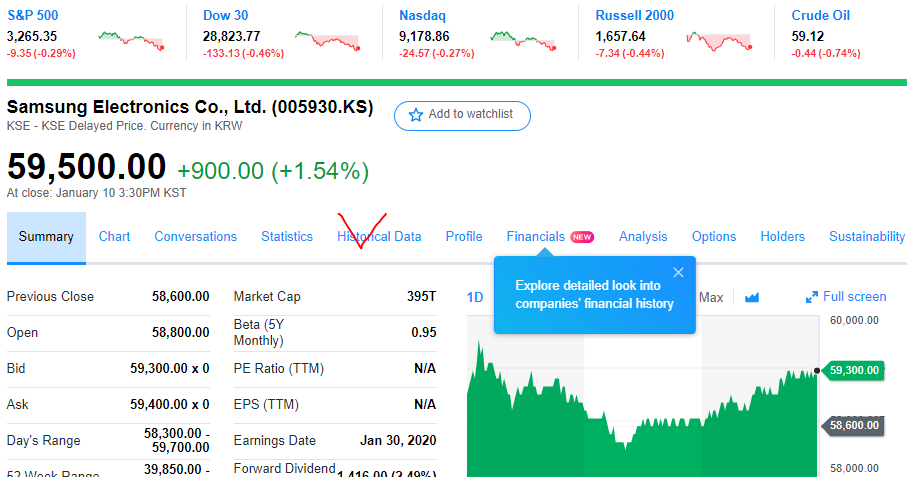

- 기간 선택 후 Download Data 클릭
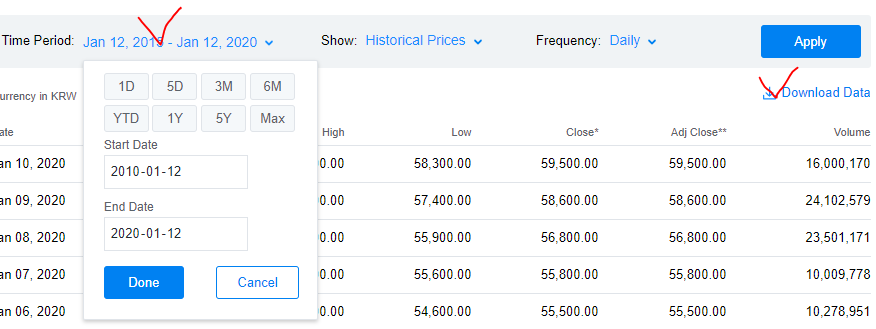

## Data Loading 및 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('005930.KS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0
...,...,...,...,...,...,...,...
5452,2021-09-09,76400.0,76600.0,75000.0,75300.0,75300.000000,17600770.0
5453,2021-09-10,75300.0,75600.0,74800.0,75300.0,75300.000000,10103212.0
5454,2021-09-13,75200.0,76300.0,75100.0,76300.0,76300.000000,11397775.0
5455,2021-09-14,77100.0,77700.0,76600.0,76600.0,76600.000000,18167057.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5457 entries, 0 to 5456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5457 non-null   object 
 1   Open       5451 non-null   float64
 2   High       5451 non-null   float64
 3   Low        5451 non-null   float64
 4   Close      5451 non-null   float64
 5   Adj Close  5451 non-null   float64
 6   Volume     5451 non-null   float64
dtypes: float64(6), object(1)
memory usage: 298.6+ KB


In [5]:
df.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [6]:
df[df['Open'].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
1304,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN
4513,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN
4518,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN
4542,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN
4755,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN
5000,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN


# 전처리
- date를 index로 설정
- 결측치 제거
- Adj Close 컬럼 제거
- MinMaxScaling

In [7]:
# date: 문자열 -> datetime 타입으로 변경
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5457 entries, 0 to 5456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5457 non-null   datetime64[ns]
 1   Open       5451 non-null   float64       
 2   High       5451 non-null   float64       
 3   Low        5451 non-null   float64       
 4   Close      5451 non-null   float64       
 5   Adj Close  5451 non-null   float64       
 6   Volume     5451 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 298.6 KB


In [8]:
# date 컬럼을 index로
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4719.226074,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4309.866211,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4340.761230,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4278.971680,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4456.618652,46880000.0
...,...,...,...,...,...,...
2021-09-09,76400.0,76600.0,75000.0,75300.0,75300.000000,17600770.0
2021-09-10,75300.0,75600.0,74800.0,75300.0,75300.000000,10103212.0
2021-09-13,75200.0,76300.0,75100.0,76300.0,76300.000000,11397775.0


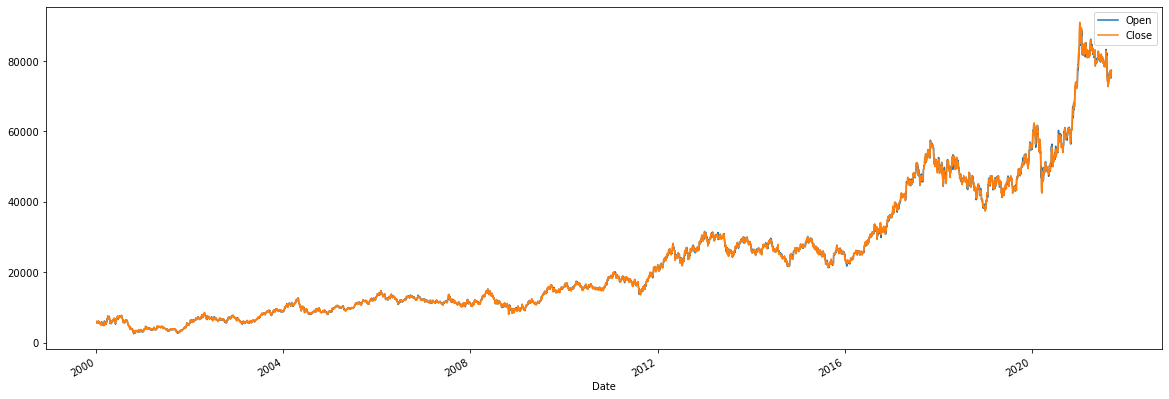

In [14]:
df[['Open', 'Close']].plot(figsize=(20,7))
plt.show()

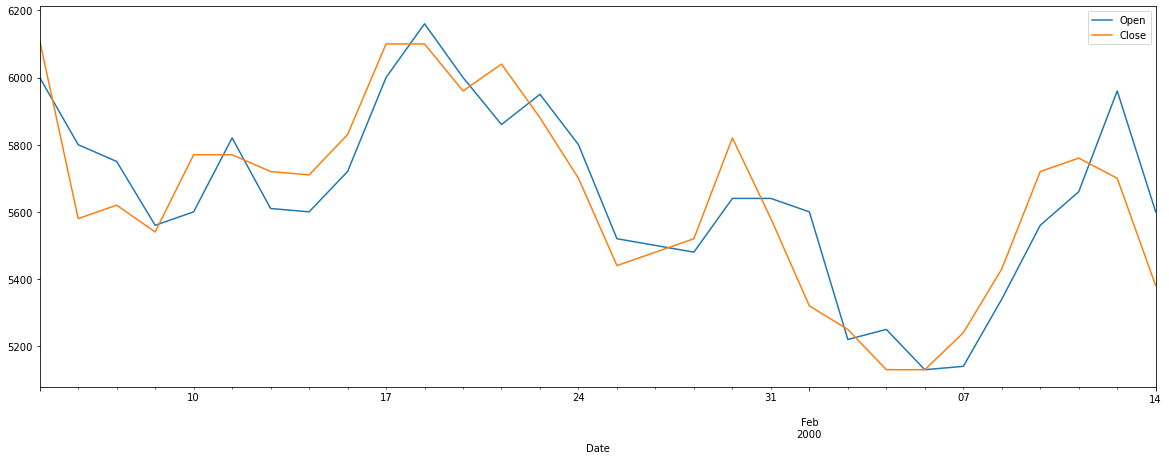

In [15]:
df[['Open', 'Close']].iloc[:30].plot(figsize=(20,7))
plt.show()

In [16]:
# 결측치 제거
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5451 entries, 2000-01-04 to 2021-09-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5451 non-null   float64
 1   High       5451 non-null   float64
 2   Low        5451 non-null   float64
 3   Close      5451 non-null   float64
 4   Adj Close  5451 non-null   float64
 5   Volume     5451 non-null   float64
dtypes: float64(6)
memory usage: 298.1 KB


In [17]:
# Adj Close 컬럼 제거
df.drop(columns=['Adj Close'], inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000.0


### X, y 분리

### Scaling - MinMaxScaler
- Scaler를 X, y 용 따로 만든다.
    - y를 inverse 하기 위해

##  날짜 종가 예측
- X: 50일치 주가, y: 51일째 주가. 
    - 50일의 연속된 주식가격으로 51일째 주가를 예측한다.
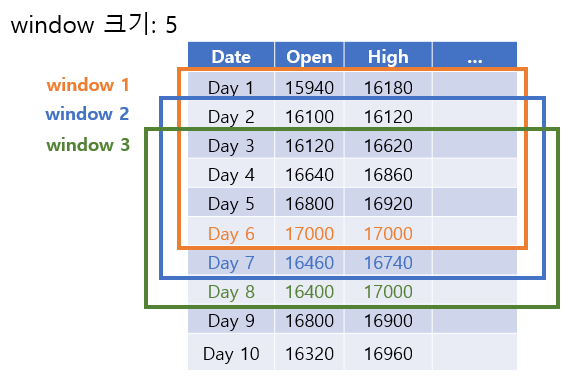     

X, y를 만든다.
각 index에 window size의 데이터셋이 들어가도록 한다.

## Train, Test 분리

## Model 생성
- LSTM 레이어는 return_sequences 인자에 따라 마지막 시퀀스에서 한 번만 출력할 수 있고 각 시퀀스에서 출력을 할 수 있다. 
    - return_sequences=True: 시퀀스마다 결과를 출력. False(기본값): 전체 Sequence를 처리하고 결과를 하나만 출력
- many to many 문제를 풀거나 LSTM 레이어를 여러개로 쌓아올릴 때는 return_sequence=True 옵션을 사용. 
- Dese에는 False로 해서 하나만 전달.
- 아래 그림에서 왼쪽은 return_sequences=False일 때, 오른쪽은 return_sequence=True일 때의 형상.

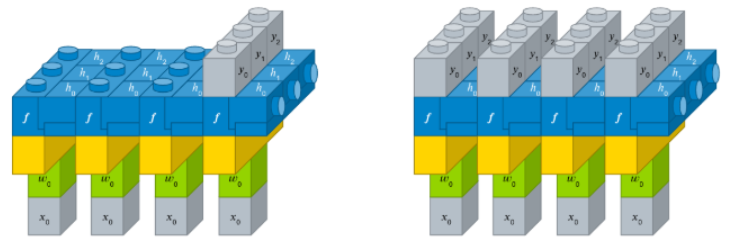

<center>[출처: https://tykimos.github.io/2017/04/09/RNN_Getting_Started]</center>

## 모델 학습, 평가

## 예측

In [ ]:
|